# Actualizaciones, Metas e Ideas

Actualizaciones
1.   Callback Checkpoint


Metas


1.   Probar otros modelos mediante transferlearning
2.   Implementar K fold cross validation 
3.   Probar un data set (cancer detection)

Ideas


1.   Elemento de lista
2.   Elemento de lista




# Definir dimension de imagen

In [ ]:
# hyperparameters 
input_height = 300
input_weight = 300
batch = 20

# Importar modelos mediante tranfer learning

In [ ]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
    
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (input_height , input_weight, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2021-03-06 17:19:10--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 172.217.7.176, 172.217.15.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   153MB/s    in 0.5s    

2021-03-06 17:19:11 (153 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 17, 17, 768)


# Ultima capa de aprendizaje

[tensorflow optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

[tensorflow losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

[tensorflow metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [ ]:
import tensorflow as tf
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(2000,kernel_regularizer='l2', activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.5)(x)
# Add a fully connected layer with 1,024 hidden units,kernel_regularization"L2" and ReLU activation
x = layers.Dense(1024, kernel_regularizer='l2',activation="relu")(x)             
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification -- OUtPUT
x = layers.Dense  (9, activation='softmax')(x)           

model = Model( pre_trained_model.input, x,name="A1") # changes model name 

model.compile(optimizer = tf.optimizers.Adam(0.6), 
              loss = tf.keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'), 
              metrics = ['accuracy'])
## Rocket science

In [ ]:
model.summary()
from contextlib import redirect_stdout
with open('modelsummary.txt', 'w') as f: # se guarda en content
    with redirect_stdout(f):
        model.summary()

Model: "A1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_________________________________________________________________________________________________

# Abrir dataset desde colab

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Importar Dataset desde kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"chrisart10","key":"a4d7a5ccdb579a3da96cba78228ec9c6"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


# Pegar Api del dataset

API fruits fresh and rotten dataset

In [ ]:
# !kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

API skin cancer mnist dataset

In [ ]:
# !kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

 22% 1.16G/5.20G [00:09<00:34, 127MB/s]
User cancelled operation


API skin cancer mnist dataset organized

In [ ]:
!kaggle datasets download -d nodoubttome/skin-cancer9-classesisic

skin-cancer9-classesisic.zip: Skipping, found more recently modified local copy (use --force to force download)


# Extraer zip

In [ ]:
import os
import zipfile

#local_zip = '/content/skin-cancer-mnist-ham10000.zip'
# local_zip = "/content/fruits-fresh-and-rotten-for-classification.zip"
local_zip = "/content/skin-cancer9-classesisic.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Calcular separacion de dataset

In [ ]:
# #1,000 a 10,000 datos
# tamaño = 10000
# T= tamaño*0.90
# validation_data_cal= T*0.2
# training_data_cal=T-validation_data_cal
# test_data_cal = tamaño*0.15
# print("### 1,000 a 10,000 datos ###")
# print("Training Data :", training_data_cal)
# print("Validation Data:",validation_data_cal)
# print("Test Data:",test_data_cal)
# #mas de 10,000
# tamaño = 100000
# T= tamaño*0.90
# validation_data_cal= T*0.1
# training_data_cal=T-validation_data_cal
# test_data_cal = tamaño*0.1
# print("###### Mas de 10,000 #######")
# print("Training Data :", training_data_cal)
# print("Validation Data:",validation_data_cal)
# print("Test Data:",test_data_cal)

### 1,000 a 10,000 datos ###
Training Data : 7200.0
Validation Data: 1800.0
Test Data: 1500.0
###### Mas de 10,000 #######
Training Data : 81000.0
Validation Data: 9000.0
Test Data: 10000.0


 # Image data preprocessing
[ImageDataPreprocessing Keras Documentation](https://keras.io/api/preprocessing/image/)

[ImageDataPreprocessing TF documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

[Youtube Tutorial](https://youtu.be/q7ZuZ8ZOErE)

# Preparar Dataset y asignar data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define our example directories and files
base_dir = '/tmp/Skin cancer ISIC The International Skin Imaging Collaboration'

train_dir = os.path.join( base_dir, 'Train')
validation_dir = os.path.join( base_dir, 'Test')
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    # classes=["freshapples",
                                                    #          "freshbanana",
                                                    #          "freshoranges",
                                                    #          "rottenapples",
                                                    #          "rottenbanana",
                                                    #          "rottenoranges"],
                                                    color_mode="rgb",
                                                    batch_size = batch,
                                                    shuffle=True,
                                                    class_mode = 'categorical',
                                                    target_size = (input_height, input_weight))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  valid_datagen.flow_from_directory( validation_dir,
                                                        #  classes=["freshapples",
                                                        #      "freshbanana",
                                                        #      "freshoranges",
                                                        #      "rottenapples",
                                                        #      "rottenbanana",
                                                        #      "rottenoranges"],
                                                         color_mode="rgb",
                                                         batch_size  = batch,
                                                          shuffle=True,
                                                         class_mode  = 'categorical', 
                                                         target_size = (input_height, input_weight))

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
#info
print(train_generator.class_indices)
print(train_generator.class_mode)
print(train_generator.image_shape)
print(train_generator.batch_size)

{'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}
categorical
(300, 300, 3)
20


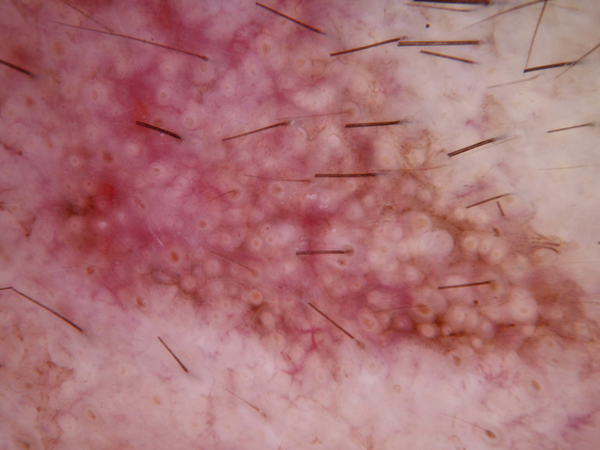

In [ ]:
from PIL import Image
Image.open("/tmp/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025780.jpg")

# Callbacks API 
[Callbacks Keras Documentation](https://keras.io/api/callbacks)

[Callbacks TF Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks)



# Callback Checkpoint

In [ ]:
# checkpoint_filepath = '/tmp/checkpoint'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

# # Model weights are saved at the end of every epoch, if it's the best seen
# # so far.
# model.fit(epochs=EPOCHS, callbacks=[model_checkpoint_callback])

# #  The model weights (that are considered the best) are loaded into the model.
# model.load_weights(checkpoint_filepath)


# Early stopping


In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') >= 0.90):
                print("\nReached 98% accuracy so cancelling training!")
                self.model.stop_training = True
callbacks = myCallback()

# Entrenar el modelo

In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs =30,
            callbacks=[callbacks],
            verbose = 1,
            batch_size=batch)

Epoch 1/30
112/112 [==============================] - 83s 738ms/step - loss: 663.5795 - accuracy: 0.1938 - val_loss: 627.1876 - val_accuracy: 0.1356
Epoch 2/30
112/112 [==============================] - 81s 726ms/step - loss: 611.9075 - accuracy: 0.1894 - val_loss: 596.0006 - val_accuracy: 0.1356
Epoch 3/30
112/112 [==============================] - 81s 724ms/step - loss: 561.8766 - accuracy: 0.1849 - val_loss: 476.8500 - val_accuracy: 0.1356
Epoch 4/30
112/112 [==============================] - 81s 725ms/step - loss: 416.5182 - accuracy: 0.1862 - val_loss: 387.5209 - val_accuracy: 0.1356
Epoch 5/30
112/112 [==============================] - 81s 721ms/step - loss: 368.0989 - accuracy: 0.1898 - val_loss: 354.2168 - val_accuracy: 0.1356
Epoch 6/30
112/112 [==============================] - 81s 721ms/step - loss: 342.3141 - accuracy: 0.1961 - val_loss: 334.9184 - val_accuracy: 0.1356
Epoch 7/30
112/112 [==============================] - 81s 719ms/step - loss: 337.9766 - accuracy: 0.1827 -

# visualizacion del aprendizaje

<Figure size 432x288 with 0 Axes>

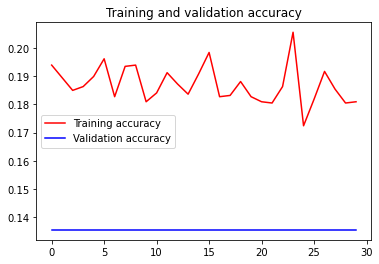

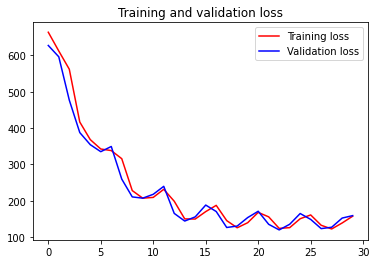

<Figure size 432x288 with 0 Axes>

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
import matplotlib.pyplot as plt
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, 'r', label='Training loss')
plt.plot  ( epochs, val_loss, 'b', label='Validation loss')
plt.title ('Training and validation loss'   )
plt.legend(loc=0)
plt.figure()

# Test del modelo 

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(input_height, input_weight))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  print(classes[0])
  print(np.argmax(classes[0]))
  
  # if classes[0]>0.5:
  #   print(fn + " is a dog")
  # else:
  #   print(fn + " is a cat")

Saving fotito.jpg to fotito.jpg
[0.0000000e+00 0.0000000e+00 0.0000000e+00 4.3152169e-36 1.0000000e+00
 7.8957935e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00]
4


# Forma de guardar Opcion 1

In [ ]:
import time
path = '/tmp/simple_keras_model'
model.save(saved_model_path)

In [ ]:
new_model = tf.keras.models.load_model('/tmp/saved_models/1612553978/')

# Check its architecture
#new_model.summary()


NameError: ignored

# Forma de guardar opcion 2

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('/tmp/saved_models/versions/my_model1.h5')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('/tmp/saved_models/versions/my_model1.h5')

# Show the model architecture
#new_model.summary()

NameError: ignored